In [7]:
import pandas as pd
from pydantic import BaseModel
from typing import List, Optional
import ast



In [3]:


# Read the CSV file
df = pd.read_csv('TRADES_CopyTr_90D_ROI.csv')


In [26]:
df.head()
# Check for missing values in each column
print("\nMissing values in each column:")
print(df.isnull().sum())

# Check for empty trade histories
empty_trades = df[df['Trade_History'].isna() | (df['Trade_History'] == '[]')].shape[0]
print(f"\nNumber of empty trade histories: {empty_trades}")

# Check data types of columns
print("\nData types of columns:")
print(df.dtypes)

# Check for any duplicate Port_IDs
duplicates = df['Port_IDs'].duplicated().sum()
print(f"\nNumber of duplicate Port_IDs: {duplicates}")


Missing values in each column:
Port_IDs         0
Trade_History    1
parsed_trades    0
dtype: int64

Number of empty trade histories: 1

Data types of columns:
Port_IDs          int64
Trade_History    object
parsed_trades    object
dtype: object

Number of duplicate Port_IDs: 0


In [27]:
# Check for missing values in Trade_History column
missing_trades = df[df['Trade_History'].isna()]

# Print number of missing trades and their corresponding Port_IDs
print(f"\nNumber of missing trades: {len(missing_trades)}")
if len(missing_trades) > 0:
    print("\nPort_IDs with missing trades:")
    print(missing_trades['Port_IDs'].tolist())

# Check for empty trade histories (empty lists)
empty_trades = df[df['Trade_History'] == '[]']
print(f"\nNumber of empty trade histories: {len(empty_trades)}")
if len(empty_trades) > 0:
    print("\nPort_IDs with empty trade histories:")
    print(empty_trades['Port_IDs'].tolist())

# Additional validation - check if all trade histories can be parsed
invalid_trades = []
for idx, trade_history in df['Trade_History'].items():
    if pd.notna(trade_history):  # Skip NaN values
        try:
            ast.literal_eval(trade_history)
        except:
            invalid_trades.append(idx)

if invalid_trades:
    print(f"\nNumber of invalid trade histories: {len(invalid_trades)}")
    print("Indices with invalid trade histories:", invalid_trades)



Number of missing trades: 1

Port_IDs with missing trades:
[3919965573764932864]

Number of empty trade histories: 0


In [28]:
# Check for specific Port_ID
specific_port = '3919965573764932864'
if specific_port in df['Port_IDs'].values:
    port_data = df[df['Port_IDs'] == specific_port]
    print(f"\nFound data for Port_ID {specific_port}:")
    print(port_data)
else:
    print(f"\nPort_ID {specific_port} not found in the dataset")



Port_ID 3919965573764932864 not found in the dataset


In [30]:

# Drop rows with missing trade histories and Port_IDs
df = df.dropna(subset=['Trade_History', 'Port_IDs'])

# Drop rows with empty trade histories (empty lists)
df = df[df['Trade_History'] != '[]']

# Print shape of dataframe after cleaning
print(f"\nShape of dataframe after removing missing/empty data: {df.shape}")




Shape of dataframe after removing missing/empty data: (149, 3)


In [31]:
df

,Port_IDs,Trade_History,parsed_trades
0,3925368433214965504,"[{'time': 1718899656000, 'symbol': 'SOLUSDT', ...","[{'time': 1718899656000, 'symbol': 'SOLUSDT', ..."
1,4002413037164645377,"[{'time': 1718980078000, 'symbol': 'NEARUSDT',...","[{'time': 1718980078000, 'symbol': 'NEARUSDT',..."
2,3923766029921022977,"[{'time': 1718677164000, 'symbol': 'ETHUSDT', ...","[{'time': 1718677164000, 'symbol': 'ETHUSDT', ..."
3,3994879592543698688,"[{'time': 1718678214000, 'symbol': 'ETHUSDT', ...","[{'time': 1718678214000, 'symbol': 'ETHUSDT', ..."
4,3926423286576838657,"[{'time': 1718979615000, 'symbol': 'ETHUSDT', ...","[{'time': 1718979615000, 'symbol': 'ETHUSDT', ..."
...,...,...,...
145,4000222729738650369,"[{'time': 1718982068000, 'symbol': 'ARKMUSDT',...","[{'time': 1718982068000, 'symbol': 'ARKMUSDT',..."
146,3998659472131949824,"[{'time': 1718979385000, 'symbol': 'BTCUSDT', ...","[{'time': 1718979385000, 'symbol': 'BTCUSDT', ..."
147,4028701921959171840,"[{'time': 1718984241000, 'symbol': 'BTCUSDT', ...","[{'time': 1718984241000, 'symbol': 'BTCUSDT', ..."
148,4014818740371615232,"[{'time': 1718983357000, 'symbol': 'SOLUSDT', ...","[{'time': 1718983357000, 'symbol': 'SOLUSDT', ..."


In [10]:
# Display the data type
print("\nData type:", type(df['Trade_History'].iloc[0]))
# Get unique keys from the first trade history entry
first_trade = ast.literal_eval(df['Trade_History'].iloc[0])[0]
print("\nKeys in trade dictionary:")
print(list(first_trade.keys()))



First row Trade_History content:
[{'time': 1718899656000, 'symbol': 'SOLUSDT', 'side': 'BUY', 'price': 132.537, 'fee': -0.9940275, 'feeAsset': 'USDT', 'quantity': 1988.055, 'quantityAsset': 'USDT', 'realizedProfit': 0.0, 'realizedProfitAsset': 'USDT', 'baseAsset': 'SOL', 'qty': 15.0, 'positionSide': 'LONG', 'activeBuy': True}, {'time': 1718899618000, 'symbol': 'DOGEUSDT', 'side': 'BUY', 'price': 0.12182, 'fee': -0.27979617, 'feeAsset': 'USDT', 'quantity': 1398.98088, 'quantityAsset': 'USDT', 'realizedProfit': 0.0, 'realizedProfitAsset': 'USDT', 'baseAsset': 'DOGE', 'qty': 11484.0, 'positionSide': 'LONG', 'activeBuy': False}, {'time': 1718899618000, 'symbol': 'DOGEUSDT', 'side': 'BUY', 'price': 0.12182, 'fee': -0.03949404, 'feeAsset': 'USDT', 'quantity': 197.47022, 'quantityAsset': 'USDT', 'realizedProfit': 0.0, 'realizedProfitAsset': 'USDT', 'baseAsset': 'DOGE', 'qty': 1621.0, 'positionSide': 'LONG', 'activeBuy': False}, {'time': 1718899616000, 'symbol': 'DOGEUSDT', 'side': 'BUY', 'pr

In [15]:
class Trade(BaseModel):
    time: int
    symbol: str
    side: str
    price: float
    fee: float
    feeAsset: str
    quantity: float
    quantityAsset: str
    realizedProfit: float
    realizedProfitAsset: str
    baseAsset: str
    qty: float
    positionSide: str
    activeBuy: bool


In [16]:

def parse_trade_history(trade_history_str):
    try:
        if pd.isna(trade_history_str):
            return []
        return ast.literal_eval(trade_history_str)
    except (ValueError, SyntaxError) as e:
        print(f"Error parsing trade: {e}")
        return []


df['parsed_trades'] = df['Trade_History'].apply(parse_trade_history)

trades = [Trade(**trade) for trade in df['parsed_trades'].iloc[0]]


In [24]:
# Now you can access the data in a structured way, for example:
first_trade = trades[0]
print(f"Symbol: {first_trade.symbol}")
print(f"Price: {first_trade.price}")
print(f"Quantity: {first_trade.quantity}")

Symbol: SOLUSDT
Price: 132.537
Quantity: 1988.055


In [14]:

all_trades_data = []


for index, row in df.iterrows():
    port_id = row['Port_IDs']
    trades = row['parsed_trades']

    for trade in trades:
        trade_dict = trade.copy()  
        trade_dict['Port_ID'] = port_id  
        all_trades_data.append(trade_dict)


trades_df = pd.DataFrame(all_trades_data)


trades_df['datetime'] = pd.to_datetime(trades_df['time'], unit='ms')


print("Shape of the trades dataframe:", trades_df.shape)
trades_df.head()


Shape of the trades dataframe: (211277, 16)


,time,symbol,side,price,fee,feeAsset,quantity,quantityAsset,realizedProfit,realizedProfitAsset,baseAsset,qty,positionSide,activeBuy,Port_ID,datetime
0,1718899656000,SOLUSDT,BUY,132.53700,-0.994027,USDT,1988.05500,USDT,0.0,USDT,SOL,15.0,LONG,True,3925368433214965504,2024-06-20 16:07:36
1,1718899618000,DOGEUSDT,BUY,0.12182,-0.279796,USDT,1398.98088,USDT,0.0,USDT,DOGE,11484.0,LONG,False,3925368433214965504,2024-06-20 16:06:58
2,1718899618000,DOGEUSDT,BUY,0.12182,-0.039494,USDT,197.47022,USDT,0.0,USDT,DOGE,1621.0,LONG,False,3925368433214965504,2024-06-20 16:06:58
3,1718899616000,DOGEUSDT,BUY,0.12182,-0.008284,USDT,16.56752,USDT,0.0,USDT,DOGE,136.0,LONG,True,3925368433214965504,2024-06-20 16:06:56
4,1718899616000,DOGEUSDT,BUY,0.12182,-0.046109,USDT,92.21774,USDT,0.0,USDT,DOGE,757.0,LONG,True,3925368433214965504,2024-06-20 16:06:56


In [18]:
trades_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211277 entries, 0 to 211276
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   time                 211277 non-null  int64         
 1   symbol               211277 non-null  object        
 2   side                 211277 non-null  object        
 3   price                211277 non-null  float64       
 4   fee                  211277 non-null  float64       
 5   feeAsset             211277 non-null  object        
 6   quantity             211277 non-null  float64       
 7   quantityAsset        211277 non-null  object        
 8   realizedProfit       211277 non-null  float64       
 9   realizedProfitAsset  211277 non-null  object        
 10  baseAsset            211277 non-null  object        
 11  qty                  211277 non-null  float64       
 12  positionSide         211277 non-null  object        
 13  activeBuy     

In [19]:
trades_df.describe()

,time,price,fee,quantity,realizedProfit,qty,Port_ID,datetime
count,2.112770e+05,211277.000000,211277.000000,211277.000000,211277.000000,2.112770e+05,2.112770e+05,211277
mean,1.717434e+12,4129.040315,-0.382787,975.509483,3.270818,1.090626e+04,3.964346e+18,2024-06-03 16:55:40.300265216
min,1.713804e+12,0.000158,-120.458652,0.006694,-3269.194444,1.000000e-03,3.672755e+18,2024-04-22 16:48:03
25%,1.716470e+12,0.143830,-0.179868,23.340915,0.000000,2.000000e+00,3.942631e+18,2024-05-23 13:16:50
50%,1.717761e+12,2.483300,-0.051732,127.775000,0.000000,2.600000e+01,3.977117e+18,2024-06-07 11:42:17
75%,1.718640e+12,44.621000,-0.009454,404.012000,0.577590,5.790000e+02,4.011627e+18,2024-06-17 15:52:12
max,1.718990e+12,72105.000000,0.000000,602293.260000,8186.254058,2.100000e+07,4.041860e+18,2024-06-21 17:11:45
std,1.351340e+09,15363.534288,1.793858,4667.098916,57.895095,1.562781e+05,6.102597e+16,NaN


In [20]:
import numpy as np

def calculate_metrics(trades_df, port_id=None):
    # Filter trades for specific portfolio if port_id is provided
    if port_id:
        df = trades_df[trades_df['Port_ID'] == port_id]
    else:
        df = trades_df.copy()
    
    # Calculate daily PnL
    df['daily_pnl'] = df.groupby(df['datetime'].dt.date)['realizedProfit'].sum()
    
    # 1. Total PnL
    total_pnl = df['realizedProfit'].sum()
    
    # 2. ROI (assuming we have initial investment data)
    # ROI = (Final Value - Initial Value) / Initial Value * 100
    # You'll need to modify this based on your initial investment value
    initial_investment = df['quantity'].iloc[0] * df['price'].iloc[0]  # Example
    roi = (total_pnl / initial_investment) * 100
    
    # 3. Sharpe Ratio
    # Assuming risk-free rate = 0 for simplicity
    daily_returns = df.groupby(df['datetime'].dt.date)['realizedProfit'].sum()
    sharpe_ratio = np.sqrt(252) * (daily_returns.mean() / daily_returns.std())
    
    # 4. Maximum Drawdown
    cumulative_returns = (1 + daily_returns).cumprod()
    rolling_max = cumulative_returns.expanding().max()
    drawdowns = cumulative_returns/rolling_max - 1
    max_drawdown = drawdowns.min() * 100
    
    # 5. Win Rate and Position Counts
    winning_trades = df[df['realizedProfit'] > 0]
    total_trades = len(df)
    win_rate = (len(winning_trades) / total_trades) * 100 if total_trades > 0 else 0
    
    metrics = {
        'Total_PnL': total_pnl,
        'ROI_%': roi,
        'Sharpe_Ratio': sharpe_ratio,
        'Max_Drawdown_%': max_drawdown,
        'Win_Rate_%': win_rate,
        'Winning_Positions': len(winning_trades),
        'Total_Positions': total_trades
    }
    
    return metrics

# Calculate metrics for all portfolios
all_metrics = calculate_metrics(trades_df)
print("\nOverall Metrics:")
for metric, value in all_metrics.items():
    print(f"{metric}: {value:.2f}")

# Calculate metrics per portfolio
print("\nMetrics by Portfolio:")
for port_id in trades_df['Port_ID'].unique():
    print(f"\nPortfolio ID: {port_id}")
    portfolio_metrics = calculate_metrics(trades_df, port_id)
    for metric, value in portfolio_metrics.items():
        print(f"{metric}: {value:.2f}")

# Optional: Create a metrics DataFrame for all portfolios
metrics_df = pd.DataFrame([
    calculate_metrics(trades_df, port_id) 
    for port_id in trades_df['Port_ID'].unique()
], index=trades_df['Port_ID'].unique())

# Display the metrics DataFrame
print("\nMetrics Summary:")
metrics_df


Overall Metrics:
Total_PnL: 691048.66
ROI_%: 262.27
Sharpe_Ratio: 11.73
Max_Drawdown_%: -72106497838814289178898799222799585475970394012081160705907086183304352506033002440311166526584624876076628608938300910296686395398036576534528.00
Win_Rate_%: 39.70
Winning_Positions: 83868.00
Total_Positions: 211277.00

Metrics by Portfolio:

Portfolio ID: 3925368433214965504
Total_PnL: 6789.44
ROI_%: 2.58
Sharpe_Ratio: 11.64
Max_Drawdown_%: 0.00
Win_Rate_%: 33.33
Winning_Positions: 486.00
Total_Positions: 1458.00

Portfolio ID: 4002413037164645377
Total_PnL: 3686.97
ROI_%: 248.28
Sharpe_Ratio: 8.88
Max_Drawdown_%: -8.61
Win_Rate_%: 18.58
Winning_Positions: 107.00
Total_Positions: 576.00

Portfolio ID: 3923766029921022977
Total_PnL: 772.73
ROI_%: 0.07
Sharpe_Ratio: 5.50
Max_Drawdown_%: -1064097067695.39
Win_Rate_%: 28.51
Winning_Positions: 359.00
Total_Positions: 1259.00

Portfolio ID: 3994879592543698688
Total_PnL: 3658.77
ROI_%: 0.02
Sharpe_Ratio: 9.09
Max_Drawdown_%: -42951686159.01
Win_Rate_%

C:\Users\abhas\AppData\Local\Temp\ipykernel_2728\2658263900.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['daily_pnl'] = df.groupby(df['datetime'].dt.date)['realizedProfit'].sum()
C:\Users\abhas\AppData\Local\Temp\ipykernel_2728\2658263900.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['daily_pnl'] = df.groupby(df['datetime'].dt.date)['realizedProfit'].sum()
C:\Users\abhas\AppData\Local\Temp\ipykernel_2728\2658263900.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of

Total_PnL: 343.47
ROI_%: 0.00
Sharpe_Ratio: 0.22
Max_Drawdown_%: -12041239170394705887232.00
Win_Rate_%: 41.41
Winning_Positions: 200.00
Total_Positions: 483.00

Portfolio ID: 4030565764341697025
Total_PnL: 2789.88
ROI_%: 26.86
Sharpe_Ratio: 10.36
Max_Drawdown_%: -29.05
Win_Rate_%: 48.57
Winning_Positions: 51.00
Total_Positions: 105.00

Portfolio ID: 4034786679304751616
Total_PnL: 2521.08
ROI_%: 265.27
Sharpe_Ratio: 12.91
Max_Drawdown_%: 0.00
Win_Rate_%: 38.32
Winning_Positions: 123.00
Total_Positions: 321.00

Portfolio ID: 4029299190618134272
Total_PnL: 3354.15
ROI_%: 8666.22
Sharpe_Ratio: 7.81
Max_Drawdown_%: 0.00
Win_Rate_%: 31.30
Winning_Positions: 72.00
Total_Positions: 230.00

Portfolio ID: 4030555430101054209
Total_PnL: 3358.38
ROI_%: 0.00
Sharpe_Ratio: 13.66
Max_Drawdown_%: 0.00
Win_Rate_%: 26.45
Winning_Positions: 32.00
Total_Positions: 121.00

Portfolio ID: 4031414524297538817
Total_PnL: 2726.80
ROI_%: 70.72
Sharpe_Ratio: 10.89
Max_Drawdown_%: -88.06
Win_Rate_%: 36.89
Winning

C:\Users\abhas\AppData\Local\Temp\ipykernel_2728\2658263900.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['daily_pnl'] = df.groupby(df['datetime'].dt.date)['realizedProfit'].sum()
C:\Users\abhas\AppData\Local\Temp\ipykernel_2728\2658263900.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['daily_pnl'] = df.groupby(df['datetime'].dt.date)['realizedProfit'].sum()
C:\Users\abhas\AppData\Local\Temp\ipykernel_2728\2658263900.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of

Total_PnL: 5284.65
ROI_%: 0.00
Sharpe_Ratio: 8.31
Max_Drawdown_%: -30013972661367544.00
Win_Rate_%: 48.94
Winning_Positions: 391.00
Total_Positions: 799.00

Portfolio ID: 3939925275039085824
Total_PnL: 2378.88
ROI_%: 987.07
Sharpe_Ratio: 15.85
Max_Drawdown_%: -2544546402332.67
Win_Rate_%: 36.23
Winning_Positions: 2148.00
Total_Positions: 5928.00

Portfolio ID: 4031493134338259457
Total_PnL: 9082.70
ROI_%: 0.00
Sharpe_Ratio: 9.76
Max_Drawdown_%: -786710580.88
Win_Rate_%: 36.16
Winning_Positions: 683.00
Total_Positions: 1889.00

Portfolio ID: 3977116548751698176
Total_PnL: 603.98
ROI_%: 0.00
Sharpe_Ratio: 1.77
Max_Drawdown_%: -11354277402807870.00
Win_Rate_%: 28.08
Winning_Positions: 456.00
Total_Positions: 1624.00

Portfolio ID: 4008537296438699777
Total_PnL: 2330.85
ROI_%: 0.00
Sharpe_Ratio: 6.84
Max_Drawdown_%: -217601375.47
Win_Rate_%: 46.54
Winning_Positions: 249.00
Total_Positions: 535.00

Portfolio ID: 3936410995029308417
Total_PnL: 10681.51
ROI_%: 0.00
Sharpe_Ratio: 6.99
Max_Draw

C:\Users\abhas\AppData\Local\Temp\ipykernel_2728\2658263900.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['daily_pnl'] = df.groupby(df['datetime'].dt.date)['realizedProfit'].sum()
C:\Users\abhas\AppData\Local\Temp\ipykernel_2728\2658263900.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['daily_pnl'] = df.groupby(df['datetime'].dt.date)['realizedProfit'].sum()
C:\Users\abhas\AppData\Local\Temp\ipykernel_2728\2658263900.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of

Total_PnL: 3078.66
ROI_%: 0.03
Sharpe_Ratio: 9.87
Max_Drawdown_%: -618318371.85
Win_Rate_%: 47.63
Winning_Positions: 331.00
Total_Positions: 695.00

Portfolio ID: 4030626027667524352
Total_PnL: 3796.35
ROI_%: 0.01
Sharpe_Ratio: 14.81
Max_Drawdown_%: 0.00
Win_Rate_%: 49.79
Winning_Positions: 116.00
Total_Positions: 233.00

Portfolio ID: 4037073643537925121
Total_PnL: 1540.40
ROI_%: 288.70
Sharpe_Ratio: 7.94
Max_Drawdown_%: 0.00
Win_Rate_%: 18.61
Winning_Positions: 83.00
Total_Positions: 446.00

Portfolio ID: 3944658614777849089
Total_PnL: 2074.45
ROI_%: 1.00
Sharpe_Ratio: 13.36
Max_Drawdown_%: 0.00
Win_Rate_%: 44.44
Winning_Positions: 20.00
Total_Positions: 45.00

Portfolio ID: 4020204877254599680
Total_PnL: 71998.86
ROI_%: 0.00
Sharpe_Ratio: 4.84
Max_Drawdown_%: -1203231456528.51
Win_Rate_%: 32.94
Winning_Positions: 1993.00
Total_Positions: 6050.00

Portfolio ID: 3819545518395756033
Total_PnL: 980.06
ROI_%: 0.00
Sharpe_Ratio: 5.76
Max_Drawdown_%: 0.00
Win_Rate_%: 38.24
Winning_Position

C:\Users\abhas\AppData\Local\Temp\ipykernel_2728\2658263900.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['daily_pnl'] = df.groupby(df['datetime'].dt.date)['realizedProfit'].sum()
C:\Users\abhas\AppData\Local\Temp\ipykernel_2728\2658263900.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['daily_pnl'] = df.groupby(df['datetime'].dt.date)['realizedProfit'].sum()
C:\Users\abhas\AppData\Local\Temp\ipykernel_2728\2658263900.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of

Total_PnL: 1947.24
ROI_%: 0.00
Sharpe_Ratio: 2.58
Max_Drawdown_%: -493122528678732416.00
Win_Rate_%: 48.61
Winning_Positions: 140.00
Total_Positions: 288.00

Portfolio ID: 3949329502284748801
Total_PnL: 425.97
ROI_%: 3369.94
Sharpe_Ratio: 5.31
Max_Drawdown_%: 0.00
Win_Rate_%: 18.75
Winning_Positions: 72.00
Total_Positions: 384.00

Portfolio ID: 3784403294629753856
Total_PnL: 2521.81
ROI_%: 223.70
Sharpe_Ratio: 9.87
Max_Drawdown_%: -493347118142886272.00
Win_Rate_%: 30.23
Winning_Positions: 1829.00
Total_Positions: 6050.00

Portfolio ID: 3977078013600312321
Total_PnL: 4622.35
ROI_%: 65.85
Sharpe_Ratio: 10.50
Max_Drawdown_%: -30806527361052.86
Win_Rate_%: 32.64
Winning_Positions: 1638.00
Total_Positions: 5018.00

Portfolio ID: 4013955990069013504
Total_PnL: 1690.03
ROI_%: 1.83
Sharpe_Ratio: 4.22
Max_Drawdown_%: -14248.04
Win_Rate_%: 65.92
Winning_Positions: 236.00
Total_Positions: 358.00

Portfolio ID: 3951723256343550465
Total_PnL: 5260.02
ROI_%: 0.31
Sharpe_Ratio: 6.00
Max_Drawdown_%: 

C:\Users\abhas\AppData\Local\Temp\ipykernel_2728\2658263900.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['daily_pnl'] = df.groupby(df['datetime'].dt.date)['realizedProfit'].sum()
C:\Users\abhas\AppData\Local\Temp\ipykernel_2728\2658263900.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['daily_pnl'] = df.groupby(df['datetime'].dt.date)['realizedProfit'].sum()
C:\Users\abhas\AppData\Local\Temp\ipykernel_2728\2658263900.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of

Total_PnL: 1317.58
ROI_%: 0.07
Sharpe_Ratio: 5.17
Max_Drawdown_%: -2015839122839.72
Win_Rate_%: 36.98
Winning_Positions: 1675.00
Total_Positions: 4530.00

Portfolio ID: 3935808725185052672
Total_PnL: 2301.96
ROI_%: 41766.51
Sharpe_Ratio: 3.71
Max_Drawdown_%: -1367911151141.83
Win_Rate_%: 35.10
Winning_Positions: 602.00
Total_Positions: 1715.00

Portfolio ID: 4040382575336130560
Total_PnL: 0.00
ROI_%: 0.00
Sharpe_Ratio: nan
Max_Drawdown_%: 0.00
Win_Rate_%: 0.00
Winning_Positions: 0.00
Total_Positions: 76.00

Portfolio ID: 3999240873283311617
Total_PnL: 42574.47
ROI_%: 30.84
Sharpe_Ratio: 11.12
Max_Drawdown_%: 0.00
Win_Rate_%: 52.32
Winning_Positions: 2366.00
Total_Positions: 4522.00

Portfolio ID: 3880920727367689984
Total_PnL: -176.83
ROI_%: -0.00
Sharpe_Ratio: -1.08
Max_Drawdown_%: -4647089.31
Win_Rate_%: 33.79
Winning_Positions: 49.00
Total_Positions: 145.00

Portfolio ID: 3956048468100538880
Total_PnL: 1373.56
ROI_%: 0.00
Sharpe_Ratio: 11.85
Max_Drawdown_%: 0.00
Win_Rate_%: 71.43
Wi

C:\Users\abhas\AppData\Local\Temp\ipykernel_2728\2658263900.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['daily_pnl'] = df.groupby(df['datetime'].dt.date)['realizedProfit'].sum()
C:\Users\abhas\AppData\Local\Temp\ipykernel_2728\2658263900.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['daily_pnl'] = df.groupby(df['datetime'].dt.date)['realizedProfit'].sum()
C:\Users\abhas\AppData\Local\Temp\ipykernel_2728\2658263900.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of


Metrics Summary:


C:\Users\abhas\AppData\Local\Temp\ipykernel_2728\2658263900.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['daily_pnl'] = df.groupby(df['datetime'].dt.date)['realizedProfit'].sum()
C:\Users\abhas\AppData\Local\Temp\ipykernel_2728\2658263900.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['daily_pnl'] = df.groupby(df['datetime'].dt.date)['realizedProfit'].sum()
C:\Users\abhas\AppData\Local\Temp\ipykernel_2728\2658263900.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of

,Total_PnL,ROI_%,Sharpe_Ratio,Max_Drawdown_%,Win_Rate_%,Winning_Positions,Total_Positions
3925368433214965504,6789.436739,2.576726,11.639229,0.000000e+00,33.333333,486,1458
4002413037164645377,3686.969761,248.275196,8.881713,-8.613000e+00,18.576389,107,576
3923766029921022977,772.729032,0.069130,5.501017,-1.064097e+12,28.514694,359,1259
3994879592543698688,3658.765062,0.022924,9.086070,-4.295169e+10,55.283308,361,653
3926423286576838657,1309.459960,0.035247,3.566477,-7.068524e+45,34.100418,163,478
...,...,...,...,...,...,...,...
4000222729738650369,1803.620133,175.884039,15.824489,-1.425024e+20,56.054280,537,958
3998659472131949824,1449.325940,0.000178,13.362137,0.000000e+00,48.979592,72,147
4028701921959171840,17601.401398,0.001600,8.989789,-5.432788e+16,54.294032,373,687
4014818740371615232,2013.647510,0.118738,12.670194,-8.355034e+15,20.982987,111,529


In [21]:
metrics_df.describe()

,Total_PnL,ROI_%,Sharpe_Ratio,Max_Drawdown_%,Win_Rate_%,Winning_Positions,Total_Positions
count,149.000000,1.490000e+02,148.000000,1.490000e+02,149.000000,149.000000,149.000000
mean,4637.910441,3.042321e+04,9.760297,-1.228948e+77,37.302163,562.872483,1417.966443
std,7764.101217,1.847827e+05,6.617827,1.500122e+78,14.828779,759.213438,1878.795821
min,-12346.682219,-2.075276e+02,-10.615527,-1.831132e+79,0.000000,0.000000,14.000000
25%,1787.987716,5.810078e-03,5.685467,-9.435054e+15,28.514694,61.000000,172.000000
50%,2726.795618,1.004776e+00,9.378696,-5.091260e+05,37.851240,207.000000,529.000000
75%,4760.365619,3.457635e+02,13.358145,0.000000e+00,46.542056,683.000000,1715.000000
max,71998.855953,1.854750e+06,30.206580,0.000000e+00,80.261248,2893.000000,6085.000000


C:\Users\abhas\AppData\Local\Temp\ipykernel_2728\2832745482.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['daily_pnl'] = df.groupby(df['datetime'].dt.date)['realizedProfit'].sum()
C:\Users\abhas\AppData\Local\Temp\ipykernel_2728\2832745482.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['daily_pnl'] = df.groupby(df['datetime'].dt.date)['realizedProfit'].sum()
C:\Users\abhas\AppData\Local\Temp\ipykernel_2728\2832745482.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of

Summary Statistics for All Portfolios:
          Total_PnL         ROI_%  Sharpe_Ratio  Max_Drawdown_%  Win_Rate_%  \
count    149.000000  1.490000e+02    148.000000    1.490000e+02  149.000000   
mean    4637.910441  3.042321e+04      9.760297   -1.228948e+77   37.302163   
std     7764.101217  1.847827e+05      6.617827    1.500122e+78   14.828779   
min   -12346.682219 -2.075276e+02    -10.615527   -1.831132e+79    0.000000   
25%     1787.987716  5.810078e-03      5.685467   -9.435054e+15   28.514694   
50%     2726.795618  1.004776e+00      9.378696   -5.091260e+05   37.851240   
75%     4760.365619  3.457635e+02     13.358145    0.000000e+00   46.542056   
max    71998.855953  1.854750e+06     30.206580    0.000000e+00   80.261248   

       Winning_Positions  Total_Positions  
count         149.000000       149.000000  
mean          562.872483      1417.966443  
std           759.213438      1878.795821  
min             0.000000        14.000000  
25%            61.000000     

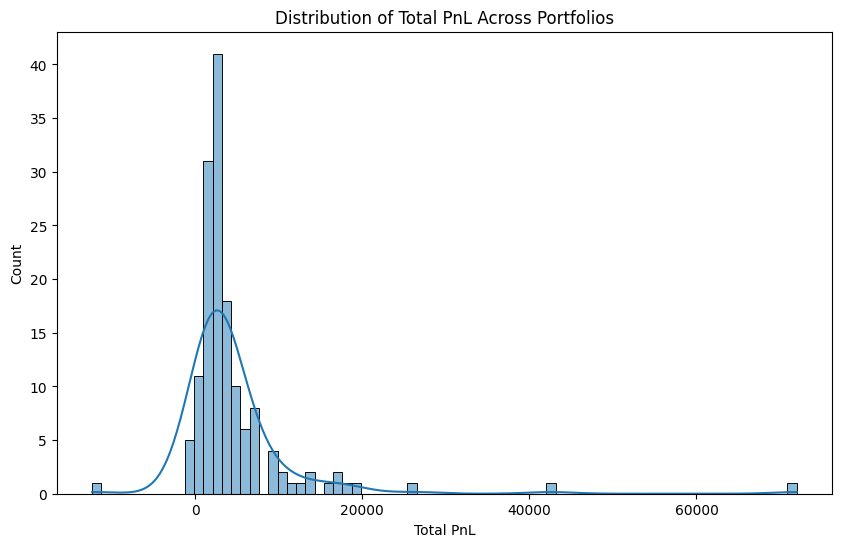

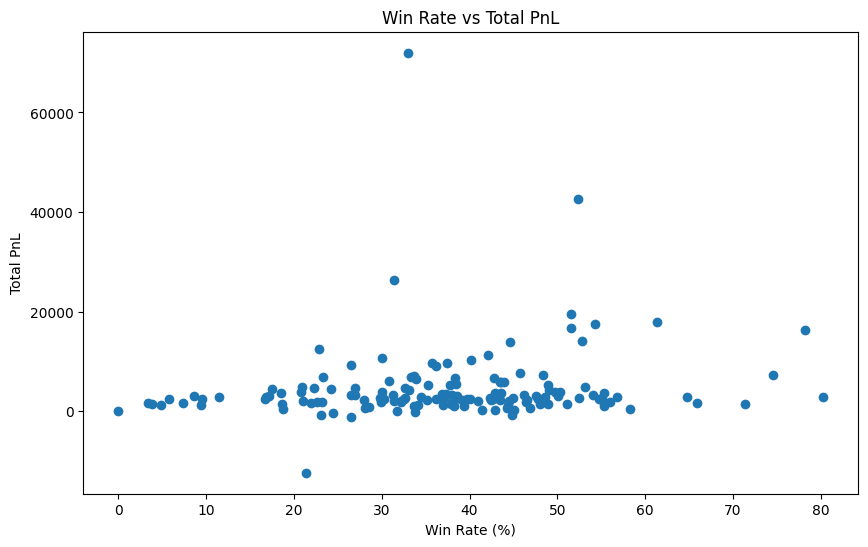

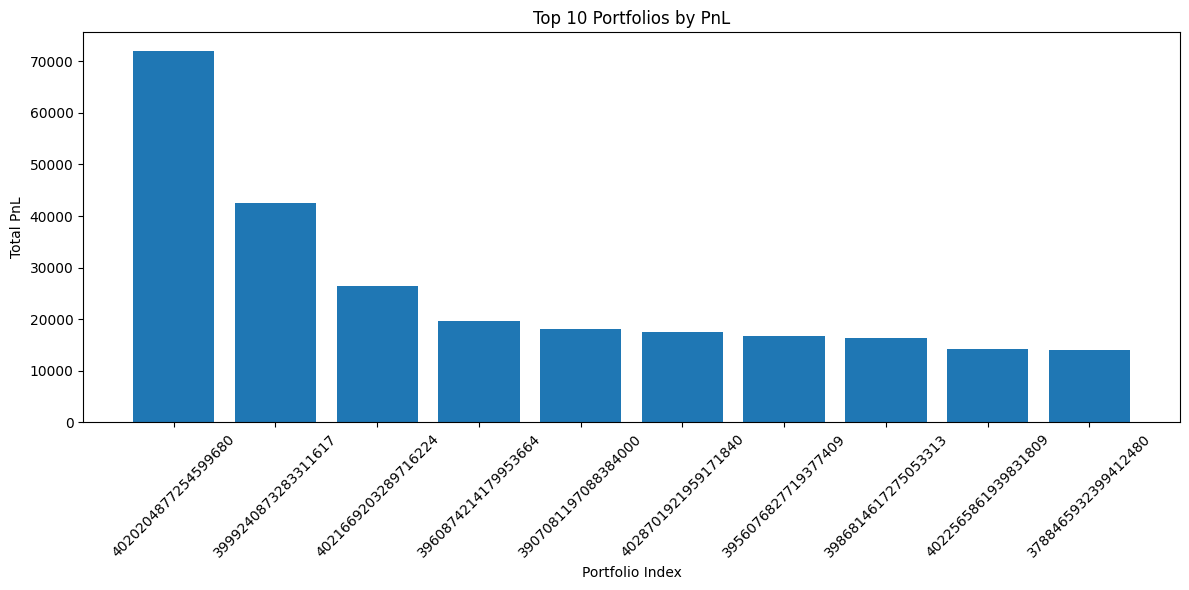

In [22]:
import numpy as np

def calculate_metrics(trades_df, port_id=None):
    # Filter trades for specific portfolio if port_id is provided
    if port_id:
        df = trades_df[trades_df['Port_ID'] == port_id]
    else:
        df = trades_df.copy()
    
    # Calculate daily PnL
    df['daily_pnl'] = df.groupby(df['datetime'].dt.date)['realizedProfit'].sum()
    
    # Calculate metrics
    total_pnl = df['realizedProfit'].sum()
    
    # Calculate ROI
    initial_investment = df['quantity'].iloc[0] * df['price'].iloc[0]
    roi = (total_pnl / initial_investment) * 100
    
    # Calculate Sharpe Ratio
    daily_returns = df.groupby(df['datetime'].dt.date)['realizedProfit'].sum()
    sharpe_ratio = np.sqrt(252) * (daily_returns.mean() / daily_returns.std())
    
    # Calculate Maximum Drawdown
    cumulative_returns = (1 + daily_returns).cumprod()
    rolling_max = cumulative_returns.expanding().max()
    drawdowns = cumulative_returns/rolling_max - 1
    max_drawdown = drawdowns.min() * 100
    
    # Calculate Win Rate and Positions
    winning_trades = df[df['realizedProfit'] > 0]
    total_trades = len(df)
    win_rate = (len(winning_trades) / total_trades) * 100 if total_trades > 0 else 0
    
    return {
        'Total_PnL': total_pnl,
        'ROI_%': roi,
        'Sharpe_Ratio': sharpe_ratio,
        'Max_Drawdown_%': max_drawdown,
        'Win_Rate_%': win_rate,
        'Winning_Positions': len(winning_trades),
        'Total_Positions': total_trades
    }

# Create a DataFrame with metrics for each portfolio
metrics_df = pd.DataFrame([
    calculate_metrics(trades_df, port_id) 
    for port_id in trades_df['Port_ID'].unique()
], index=trades_df['Port_ID'].unique())

# Display summary statistics of all portfolios
print("Summary Statistics for All Portfolios:")
print(metrics_df.describe())

# Display metrics for each portfolio
print("\nMetrics for Each Portfolio:")
print(metrics_df)

# Optional: Save to CSV
metrics_df.to_csv('portfolio_metrics.csv')

# Optional: Create visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# Distribution of Total PnL across portfolios
plt.figure(figsize=(10, 6))
sns.histplot(metrics_df['Total_PnL'], kde=True)
plt.title('Distribution of Total PnL Across Portfolios')
plt.xlabel('Total PnL')
plt.show()

# Win Rate vs Total PnL scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(metrics_df['Win_Rate_%'], metrics_df['Total_PnL'])
plt.title('Win Rate vs Total PnL')
plt.xlabel('Win Rate (%)')
plt.ylabel('Total PnL')
plt.show()

# Top 10 performing portfolios by PnL
top_10_pnl = metrics_df.nlargest(10, 'Total_PnL')
plt.figure(figsize=(12, 6))
plt.bar(range(len(top_10_pnl)), top_10_pnl['Total_PnL'])
plt.title('Top 10 Portfolios by PnL')
plt.xlabel('Portfolio Index')
plt.ylabel('Total PnL')
plt.xticks(range(len(top_10_pnl)), top_10_pnl.index, rotation=45)
plt.tight_layout()
plt.show()

In [23]:
metrics_df.describe()

,Total_PnL,ROI_%,Sharpe_Ratio,Max_Drawdown_%,Win_Rate_%,Winning_Positions,Total_Positions
count,149.000000,1.490000e+02,148.000000,1.490000e+02,149.000000,149.000000,149.000000
mean,4637.910441,3.042321e+04,9.760297,-1.228948e+77,37.302163,562.872483,1417.966443
std,7764.101217,1.847827e+05,6.617827,1.500122e+78,14.828779,759.213438,1878.795821
min,-12346.682219,-2.075276e+02,-10.615527,-1.831132e+79,0.000000,0.000000,14.000000
25%,1787.987716,5.810078e-03,5.685467,-9.435054e+15,28.514694,61.000000,172.000000
50%,2726.795618,1.004776e+00,9.378696,-5.091260e+05,37.851240,207.000000,529.000000
75%,4760.365619,3.457635e+02,13.358145,0.000000e+00,46.542056,683.000000,1715.000000
max,71998.855953,1.854750e+06,30.206580,0.000000e+00,80.261248,2893.000000,6085.000000
